In [3]:
import os
from pathlib import Path
from typing import Optional
from typing import Callable

from torch.utils.data import Subset
from torchvision.datasets import ImageFolder, CIFAR100
import matplotlib.pyplot as plt
import numpy as np
import random
from pruneshift.datamodules import datamodule

path = os.environ["DATASET_PATH"]
imagenet_path = Path("/misc/scratchSSD2/datasets/ILSVRC2012-100")

/misc/student/hoffmaja/virtual_environments/theseus/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
dm = datamodule("imagenet100", imagenet_path)

In [3]:
dm.setup("fit")
loader = dm.train_dataloader()

In [5]:
len(loader.dataset)

103805

In [6]:
129756 * 0.8

103804.8

In [180]:
len(list(imagenet_path.iterdir()))

100

In [181]:
class SplitImageFolder(ImageFolder):
    """ Efficiently calculates split sets from image folders."""
    def __init__(self, root: str, transform: Optional[Callable]=None):
        super(SplitImageFolder, self).__init__(root=root,
                                               transform=transform)

    def split(self, val_split: float):
        """ Returns two datasets."""
        assert 0 <= val_split <= 1

        val_ranges = []
        train_ranges = []

        for cr in self.class_ranges():
            split_point = int(len(cr) * val_split)
            val_ranges.append(cr[:split_point])
            train_ranges.append(cr[split_point:])

        val_idx = [idx for part in val_ranges for idx in part]
        train_idx = [idx for part in train_ranges for idx in part]

        return Subset(self, val_idx), Subset(self, train_idx)
        
    def class_ranges(self):
        class_ranges = []
        last_border = 0
        
        for border in np.cumsum(self.num_examples()):
            class_ranges.append(range(last_border, border))
            last_border = border
            
        return class_ranges
        
    def num_examples(self):
        path = Path(self.root)
        
        # We need to sort the class directories as this is done by ImageFolder.
        sorted_class_dirs = sorted(path.iterdir())
        num_examples = [len(list(d.glob("*.*"))) for d in sorted_class_dirs]

        return np.array(num_examples)
     

In [182]:
split_set = SplitImageFolder(imagenet_path)

In [183]:
split_set.split(0.2)

(<torch.utils.data.dataset.Subset at 0x7f756d7a20f0>,
 <torch.utils.data.dataset.Subset at 0x7f756d7a26a0>)

In [164]:
split_set.class_to_idx['n02391049']

95

In [165]:
split_set.num_examples()

array([1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300,
       1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300,
       1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300,
       1300, 1300, 1150, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300,
       1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300,
       1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300,
       1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300,
       1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300,
       1300, 1300, 1300, 1300, 1206, 1300, 1300, 1300, 1300, 1300, 1300,
       1300])

In [167]:
split_set.class_ranges()[-8]

range(119450, 120656)

In [171]:
split_set[120655]

(<PIL.Image.Image image mode=RGB size=100x100 at 0x7F75D7F9AD30>, 92)

In [87]:
cifar_set[0][1]

19

In [90]:
num_examples = np.array([cifar_set[idx][1] for idx in range(5000)])

(array([482., 468., 474., 511., 503., 545., 551., 493., 500., 473.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

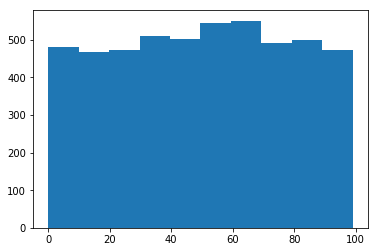

In [91]:
plt.hist(num_examples)

In [46]:
dataset = ImageFolder("/misc/scratchSSD2/datasets/ILSVRC2012-100/train")

In [92]:
imagenet100_classes = np.array([c for _, c in dataset])

KeyboardInterrupt: 

In [69]:
len(dataset)

129756

In [ ]:
datamodule("")

In [68]:
dataset[2 * len(dataset)//100 + 0]

(<PIL.Image.Image image mode=RGB size=500x333 at 0x7F7586A6E710>, 1)

In [47]:
len(dataset)

129756

In [49]:
def simulate_split(num_samples, num_classes=100, perc=0.2):
    values = list(range(num_samples))
    random.shuffle(values)
    val_set = values[:int(len(values) * perc)]

    num_examples = []
    for c in range(num_classes):
        num_examples.append(len([v for v in val_set if v % num_classes == c]))
        
    return num_examples

(array([ 1.,  2.,  7., 15., 20., 32., 13.,  7.,  2.,  1.]),
 array([ 73. ,  78.4,  83.8,  89.2,  94.6, 100. , 105.4, 110.8, 116.2,
        121.6, 127. ]),
 <a list of 10 Patch objects>)

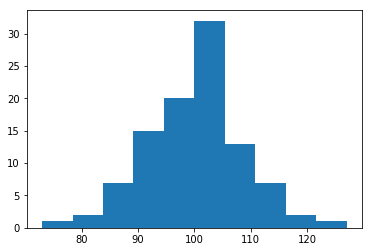

In [97]:
plt.hist(simulate_split(50000))

In [1]:
cifar_set

NameError: name 'cifar_set' is not defined

In [9]:
from torchvision.datasets import CIFAR10

cifar_set = CIFAR100(path, False)

In [10]:
len(cifar_set)

10000

In [ ]:
50000 / 